# Question
***
Ensuring or maintaining balanced reporting on issues is crutial for the public as well as for the news media companies. 
Balanced reporting is crutial to maintain credibility for reporters and news outlets. At the same time, balanced reporting ensures that readers are informed without unnecessary exaggeration. 
***
Taking this into consideration, we want to answer the following questions- -  **Is balanced reporting being followed here generally? - This is crutial to maintain credibility ; Are there are any reporters who are taking an overly negative approach in their reporting? If yes, who are they?**
***

# Approach
***
We have with us, a data set from Reutus. This contains 100 articles each by 50 Reutus reporters. (50% of the data is in the C50 train folder and 50% is in the test folder)
***
To answer our question, we going to run the ***sentiment analysis*** on the article/reporting data. We are going to run the ***VADER*** *(Valence Aware Dictionary and sEntiment Reasoner)* algorithm to assess the sentiment or emotional tone of the article texts.
This will as a result give us a positive, negative, or neutral sentiment score for each of the 100 texts for each of the 50 reporters. This sentiment scores can then be compared and analysed to answer our question.
***
If we see a *high negativity score i.e. close to 1.* Then it would indicate that the reporter is taking an overly negative approach in their reporting. on the other hand, a *high neutrality* score would confirm that the reporter is taking a more balanced approach in terms of his/her reporting.
***

# Implementation

In [20]:
#import necessary modules/packages
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt') # for tokenizing

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Helper function to read data from the ReutersC50 folder
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    files = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
                files.append(file_name)
    return texts, labels , files

# Reading the data from the train and test folders
train_texts, train_labels, train_files = read_data_from_directory("ReutersC50/C50train")
test_texts, test_labels, test_files = read_data_from_directory("ReutersC50/C50test")

In [6]:
#Here - we are not predicting anyting, so we can use the entire data for the analysis

#combining the data from the training and testing data - 
combined_texts = train_texts + test_texts
combined_labels = train_labels + test_labels
combined_files = train_files + test_files

In [10]:
#set the location for the vader_lexicon information to be stored
data_dir = "../data/"
nltk.data.path.append(os.path.abspath(data_dir))

#download the vader_lexicon reference to be used for the sentiment analysis
nltk.download('vader_lexicon', download_dir=data_dir)

#define a function to take a text as a input and return the sentiment analysis of the same text
def get_sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

[nltk_data] Downloading package vader_lexicon to ../data/...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
sentiment_scores_list = []

#run the sentiment analysis on the combined set of all the articles/reports
for i in range(len(combined_labels)):
    text = combined_texts[i]
    sentiment_scores = get_sentiment_scores(text)
    sentiment_scores['author'] = combined_labels[i]
    sentiment_scores['document'] = combined_files[i]
    sentiment_scores_list.append(sentiment_scores)

In [19]:
#prepare the data in a dataframe for the result analysis
sentiment_df = pd.DataFrame(sentiment_scores_list)
sentiment_df = sentiment_df[["author","document","neg","neu","pos"]]

sentiment_df.head()

,author,document,neg,neu,pos
0,AaronPressman,106247newsML.txt,0.175,0.732,0.093
1,AaronPressman,120600newsML.txt,0.062,0.875,0.063
2,AaronPressman,120683newsML.txt,0.000,0.900,0.100
3,AaronPressman,136958newsML.txt,0.025,0.892,0.083
4,AaronPressman,137498newsML.txt,0.017,0.887,0.096


***
# Results
***
***
**1)**   At first, we try to plot and analyse the average Negative Sentiment Scores for each of the 50 reporters.

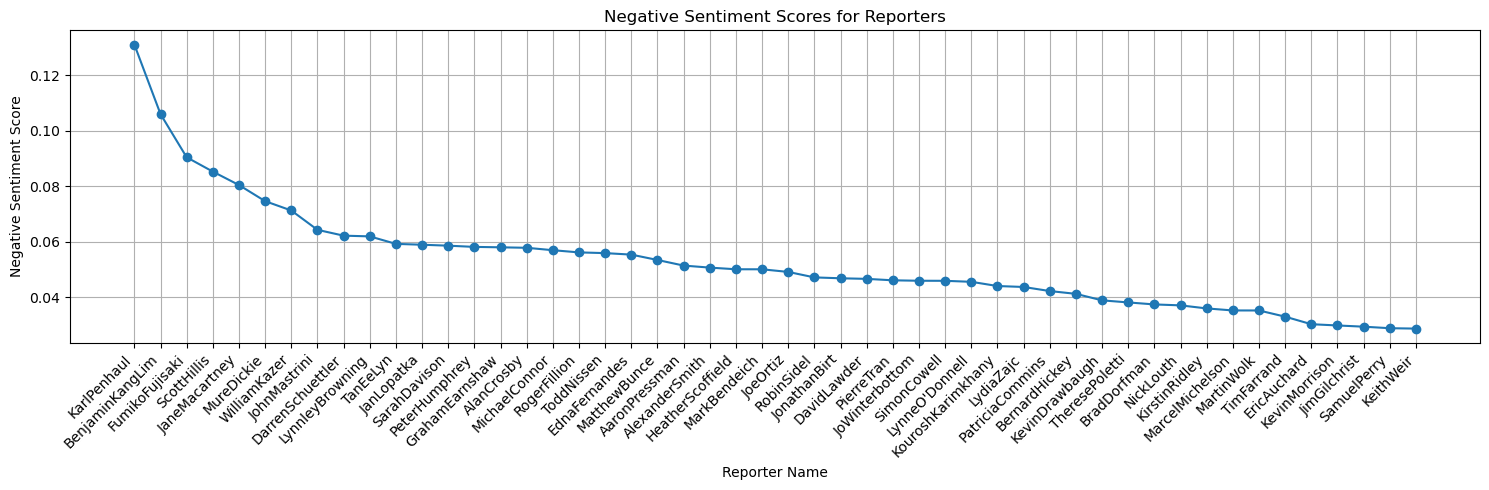

In [16]:
sentiment_temp_df = sentiment_df.groupby(["author"])["neg"].agg("mean").sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 5))
plt.plot(sentiment_temp_df.index, sentiment_temp_df['neg'], marker='o', linestyle='-')
plt.xticks(sentiment_temp_df.index, sentiment_temp_df['author'], rotation=45, ha='right')
plt.xlabel('Reporter Name')
plt.ylabel('Negative Sentiment Score')
plt.title('Negative Sentiment Scores for Reporters')
plt.grid(True)
plt.tight_layout()
plt.show()

***
Here, if we observe the Negative Sentiment Score distribution for almost all of the Reporters 
- For, 40 of the 50 reporters, the Negative Sentiment Score is below ***0.06.*** 
- Even for the 10 reporters who have a relatively higher Negative Sentiment Score, for most of the reporters the negetivity score is less than ***0.1.***
- Karl Penhaul is the reporter with the highest Negative Sentiment with a score of around ***0.12***. A close second is Benjamin Kang Lim with a negativity score just crossing ***0.1***
___
This actually shows that for the articles by the 50 Reutus reporters ,***the Negative Sentiment Score is actually quite low.***
***
***
**2)**   At first, we try to plot and analyse the average Neutral Sentiment Scores for each of the 50 reporters.

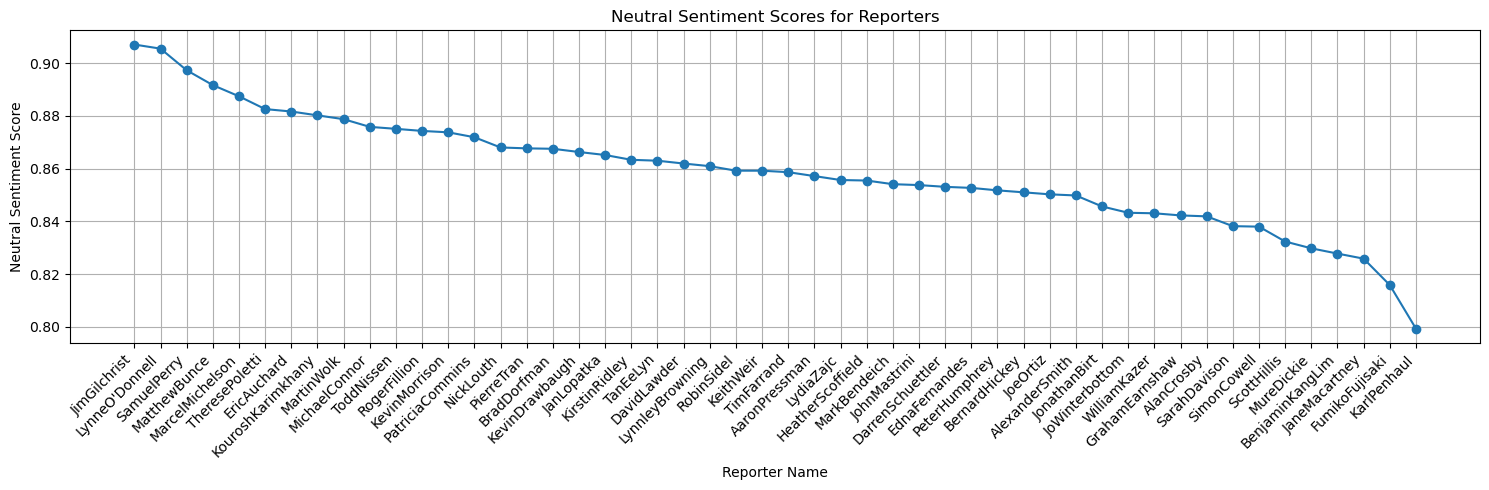

In [17]:
sentiment_temp_df = sentiment_df.groupby(["author"])["neu"].agg("mean").sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 5))
plt.plot(sentiment_temp_df.index, sentiment_temp_df['neu'], marker='o', linestyle='-')
plt.xticks(sentiment_temp_df.index, sentiment_temp_df['author'], rotation=45, ha='right')
plt.xlabel('Reporter Name')
plt.ylabel('Neutral Sentiment Score')
plt.title('Neutral Sentiment Scores for Reporters')
plt.grid(True)
plt.tight_layout()
plt.show()

***
Here, if we observe the Neutral Sentiment Score distribution for almost all of the Reporters 
- The minimum Neutral Sentiment Score for all the authors is itself quite high at *0.8*. This is seen the in the case of Karl Penhaul. He is the same reporter who had the highest Negativity Score. 
- For the other reporters, the Neutral Sentiment Score is even higher, with score starting from *0.82* and even crossing *0.90*.
- Jim Gilcrist and Lynne O'Donnell are the reporters with the highest Neutral Sentiment Score which is well over *0.90*.
___
This actually shows that for the articles by the 50 Reutus reporters ,***the Neutral Sentiment Score is actually quite high.***
***
***

# Conclusion
***
- The analysis reveals that negetivity score is actually quite low i.e. close to 0. This indicates that that the reporters are not taking an overly negative approach in their reporting. This is helpful as it does not add to polarization in society
- The analysis reveals that neutrality score for the reporters is actually quite high. This indicates that the reporters are taking a balanced approach in their reporting. This ensures that the readers are informed without exaggeration.
***
Thus, as a result, the Reuters organization would be able to **maintain their credibility** as a news outlet in the eyes of the public and at the same time, act a **responsible journalistic** organization.